In [2]:
import pandas as pd
import numpy as np
import random

In [3]:
df = pd.read_csv("../EuroMillions_numbers.csv", sep=";")
df.head()

,Date,N1,N2,N3,N4,N5,E1,E2,Winner,Gain
0,2004-12-24,3,27,29,4,37,6,5,1,10000000
1,2004-12-17,49,22,19,15,46,9,2,1,26215627
2,2004-11-26,24,1,34,4,36,8,6,1,43756502
3,2004-10-22,9,25,1,40,23,3,9,1,25059130
4,2004-01-10,48,20,45,21,12,6,5,1,29785269


In [ ]:
df_to_add = pd.DataFrame([['2021-01-02', 4, 7, 13, 22, 34, 4, 8, 0, 100000]], columns=list('Date', 'N1','N2','N3','N4','N5','E1','E2','Winner', 'Gain'))

## Répartition des numéros

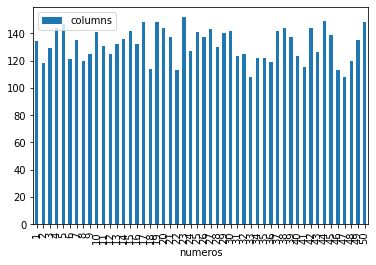

In [233]:
numeros = df[["N1", "N2", "N3", "N4", "N5"]]
melt_numeros = numeros.melt(var_name='columns', value_name='numeros')
repartition_numeros = melt_numeros.groupby(["numeros"]).count()
ax = repartition_numeros.plot.bar(y='columns')

### Les 5 numéros qui sortent le plus

In [234]:
repartition_numeros["columns"].nlargest(5)

numeros
23    152
44    149
17    148
19    148
50    148
Name: columns, dtype: int64

## Répartition des étoiles

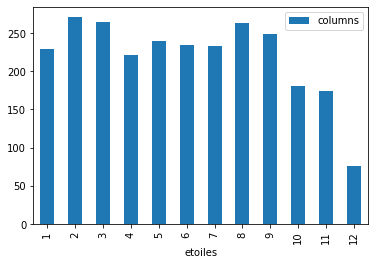

In [235]:
etoiles = df[["E1", "E2"]]
melt_etoiles = etoiles.melt(var_name='columns', value_name='etoiles')
repartition_etoiles = melt_etoiles.groupby(["etoiles"]).count()
ax = repartition_etoiles.plot.bar(y='columns')

### Les 2 numéros étoiles qui sortent le plus

In [236]:
repartition_etoiles["columns"].nlargest(2)

etoiles
2    271
3    265
Name: columns, dtype: int64

## Create Data

In [237]:
def createRows(tirages, n=4):
    tirages_tmp = np.copy(tirages)
    l = []
    for t in tirages_tmp:
        tmp = np.copy(t[:5])
        t = np.append(t, [oddEvenPatterns(tmp)], axis=0)
        t = np.append(t, [lowHighPatterns(tmp)], axis=0)
        t = np.append(t, [1], axis=0)
        l.append(t)
    tirages_tmp = np.array(l)
    
    for tirage in tirages:
        
        array_numeros = tirage[:5]
        array_etoiles = tirage[-2:]
        
        for i in range(n):
            numeros_generation = np.random.choice(np.arange(1, 51), replace=False, size=(5,))
            while (np.sort(array_numeros) == np.sort(numeros_generation)).all():
                numeros_generation = np.random.choice(np.arange(1, 51), replace=False, size=(5,))
            
            etoiles_generation = np.random.choice(np.arange(1, 13), replace=False, size=(2,))
            while (np.sort(array_etoiles) == np.sort(etoiles_generation)).all():
                etoiles_generation = np.random.choice(np.arange(1, 13), replace=False, size=(2,))
                
            row_to_append = np.concatenate((numeros_generation, etoiles_generation), axis=0)
            row_to_append = np.concatenate((row_to_append, [oddEvenPatterns(numeros_generation)]), axis=0)
            row_to_append = np.concatenate((row_to_append, [lowHighPatterns(numeros_generation)]), axis=0)
            row_to_append = np.concatenate((row_to_append, [0]), axis=0)
            
            tirages_tmp = np.append(tirages_tmp, [row_to_append], axis=0)
            
    return tirages_tmp

In [240]:
tirages = df[["N1", "N2", "N3", "N4", "N5", "E1", "E2"]].to_numpy()
tirages = createRows(tirages)

## Odd-even Patterns

In [238]:
def oddEvenPatterns(t):
    nb = sum(1-n%2 for n in t)
    if ((nb==1) or (nb==4)):
        result = 0.1492618323925310
    elif ((nb == 3) or (nb==2)):
        result = 0.3256621797655230
    else:
        result = 0.0250759878419453
    return result

## Low-High Patterns

In [239]:
def lowHighPatterns(t):
    nb = sum(n<26 for n in t)
    if ((nb==1) or (nb==4)):
        result = 0.1492618323925310
    elif ((nb == 3) or (nb==2)):
        result = 0.3256621797655230
    else:
        result = 0.0250759878419453
    return result